In [3]:
# 텍스트로 벡터 만들기

from numpy import *

def loadDataSet() :
    postingList = [['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
                  ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                  ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                   ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                   ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                  ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
    classVec = [0,1,0,1,0,1] # 1 is abusive, 0 not
    return postingList, classVec

def createVocabList(dataSet) :
    vocabSet = set([]) # create empty set
                        # 이 변수에 각 문서로부터 새로운 집합 유형의 변수를 생성하여 첨부
    for document in dataSet :
        vocabSet = vocabSet | set(document) #union the two sets
    return list(vocabSet)

In [4]:
def setOfWords2Vec(vocabList, inputSet) :
    returnVec = [0] * len(vocabList)
    for word in inputSet :
        if word in vocabList :
            returnVec[vocabList.index(word)] = 1
        else : print("The word : {} is not in my Vocabulary".format(word))
    return returnVec

In [8]:
list0Posts, listClasses = loadDataSet()
list0Posts

[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]

In [9]:
myVocabList = createVocabList(list0Posts)
myVocabList

['him',
 'ate',
 'cute',
 'food',
 'dog',
 'park',
 'posting',
 'licks',
 'quit',
 'to',
 'I',
 'so',
 'my',
 'garbage',
 'help',
 'not',
 'problems',
 'worthless',
 'mr',
 'steak',
 'is',
 'stupid',
 'take',
 'love',
 'stop',
 'flea',
 'how',
 'has',
 'dalmation',
 'please',
 'maybe',
 'buying']

In [10]:
setOfWords2Vec(myVocabList, list0Posts[0])

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0]

단어 벡터로 확률을 계산하기 위해서는...


    Count the number of documents in each class

    // 각 분류 항목에 대한 문서의 항목세기

    for every training document :

    // 훈련을 위한 모든 문서의 개수만큼 반복

        for each class :
    
        // 분류 항목 개수만큼 반복
    
            if a token appears in the document -> increment the count for that token
        
            // 해당 토큰이 문서 내에 있으면 -> 해당 토큰에 대한 갯수 증가
        
            increment the count for tokens
        
            //토큰에 대한 개수 증가
        
        for each class :
    
        // 분류 항목 개수만큼 반복
    
            for each token :
        
            // 토큰 개수만큼 반복
        
                divide the token count by the total count to get conditional probabilities
            
                // 조건부 확률을 구하기 위해 해당 토큰의 개수를 토큰 전체의 개수로 나눔
    
        return conditional probabilities for each class
    
        // 각 분류 항목에 대한 조건부 확률을 반환

In [5]:
# 단어 벡터로 확률 계산하기

def trainNB0(trainMatrix, trainCategory) :
    numTrainDocs = len(trainMatrix)
    numWords = len(trainMatrix[0])
    pAbusive = sum(trainCategory) / float(numTrainDocs)
    p0Num = zeros(numWords)
    p1Num = zeros(numWords)
    p0Denom = 0.0; p1Denom = 0.0;
    
    for i in range(numTrainDocs) : 
        if trainCategory[i] == 1 :
            p1Num += trainMatrix[i]
            p1Denom += sum(trainMatrix[i])
        else :
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])
        
    p1Vect = (p1Num / p1Denom)
    p0Vect = (p0Num / p0Denom)
    return p0Vect, p1Vect, pAbusive

In [11]:
trainMat=[]
for postinDoc in list0Posts :
    trainMat.append(setOfWords2Vec(myVocabList, postinDoc))
    
p0V, p1V, pAb = trainNB0(trainMat, listClasses)
pAb

0.5

In [12]:
p0V

array([0.08333333, 0.04166667, 0.04166667, 0.        , 0.04166667,
       0.        , 0.        , 0.04166667, 0.        , 0.04166667,
       0.04166667, 0.04166667, 0.125     , 0.        , 0.04166667,
       0.        , 0.04166667, 0.        , 0.04166667, 0.04166667,
       0.04166667, 0.        , 0.        , 0.04166667, 0.04166667,
       0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
       0.        , 0.        ])

In [13]:
p1V

array([0.05263158, 0.        , 0.        , 0.05263158, 0.10526316,
       0.05263158, 0.05263158, 0.        , 0.05263158, 0.05263158,
       0.        , 0.        , 0.        , 0.05263158, 0.        ,
       0.05263158, 0.        , 0.10526316, 0.        , 0.        ,
       0.        , 0.15789474, 0.05263158, 0.        , 0.05263158,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05263158, 0.05263158])

In [16]:
def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1) :
    p1 = sum(vec2Classify * p1Vec) + log(pClass1) # element = wise mult
    p0 = sum(vec2Classify * p0Vec) + log(1.0 - pClass1)
    
    if p1 > p0 :
        return 1
    else :
        return 0
    
def testingNB() :
    list0Posts, listClasses = loadDataSet()
    testEntry = ['love', 'my', 'dalmation', 'jimain']
    thisDoc = array(setOfWords2Vec(myVocabList, testEntry))
    print("{} classified as : {}\n".format(testEntry, classifyNB(thisDoc, p0V, p1V, pAb)))
    testEntry = ['stupid', 'garbage']
    thisDoc = array(setOfWords2Vec(myVocabList, testEntry))
    print("{} classified as : {}\n".format(testEntry, classifyNB(thisDoc, p0V, p1V, pAb)))

In [17]:
testingNB()

The word : jimain is not in my Vocabulary
['love', 'my', 'dalmation', 'jimain'] classified as : 0

['stupid', 'garbage'] classified as : 1



In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ROC 커브, AUC 스코어 불러오기
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [21]:
# ROC커브 그리는 함수

def plot_roc_curve(fpr, tpr) :
    plt.plot(fpr, tpr, color='orange',  label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [23]:
# 훈련용/테스트용 X,Y 세트 분류 (kNN 알고리즘에 의해)

data_X, class_label = make_classification(n_samples=1000, n_classes=2,
                                         weights=[1, 1], random_state=1)
trainX, testX, trainY, testY = train_test_split(data_X, class_label,
                                                test_size=0.3, random_state=1)
model = KNeighborsClassifier()
model.fit(trainX, trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
probs = model.predict_proba(testX)
probs = probs[:, 1]

In [25]:
roc = roc_curve(testY, probs)
print('ROC : {}'.format(roc))
auc = roc_auc_score(testY ,probs)
print('AUC : %.2f'% auc)

ROC : (array([0.        , 0.01408451, 0.0915493 , 0.18309859, 0.33098592,
       0.5       , 1.        ]), array([0.        , 0.2721519 , 0.65189873, 0.89873418, 0.98101266,
       0.99367089, 1.        ]), array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ]))
AUC : 0.91


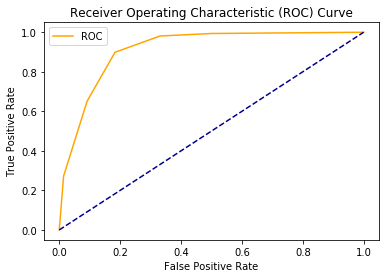

In [26]:
fpr, tpr, thresholds = roc_curve(testY, probs)
plot_roc_curve(fpr, tpr)

In [37]:
# k-fold cross-validation

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# from sklearn.linear_model import LogisticRegression

In [38]:
iris = load_iris()
KNN = KNeighborsClassifier()
scores = cross_val_score(KNN, iris.data, iris.target)
print("교차 검증 점수 : ", scores)

교차 검증 점수 :  [0.98039216 0.98039216 1.        ]


C:\ProgramData\Anaconda3\envs\ywpython\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [42]:
# logreg = LogisticRegression()

# scores = cross_val_score(logreg, iris.data, iris.target, cv = 5)
scores = cross_val_score(KNN, iris.data, iris.target, cv = 5)
print("교차 검증 점수 : ", scores)

교차 검증 점수 :  [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [43]:
print("교차 검증 평균 점수 : {:.2f}".format(scores.mean()))

교차 검증 평균 점수 : 0.97


##### 타이타닉 데이터를 통해 죽을지 살지 예측하는 모델

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
titanic = pd.read_csv("C:/Users/Affinity/Desktop/개인자료/module3/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
# 데이터 타입 확인

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [48]:
# 잘못 타입이 들어가있는 경우도 있어서 형변환을 시켜줘야한다.

titanic["Survived"] = titanic["Survived"].astype(object)
titanic["Pclass"] = titanic["Pclass"].astype(object)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 83.6+ KB


In [49]:
# 데이터 null값 체크

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
missing_df = titanic.isnull().sum().reset_index()
missing_df.columns = ['column', 'count']
missing_df['ratio'] = missing_df['count'] / titanic.shape[0]
missing_df.loc[missing_df['ratio'] != 0]

,column,count,ratio
10,Cabin,687,0.771044
11,Embarked,2,0.002245


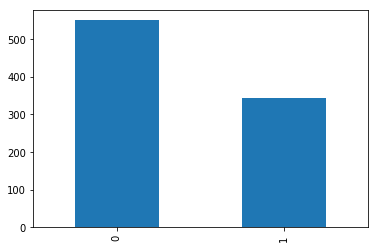

In [51]:
# 종속변수 분포 확인

titanic['Survived'].value_counts().plot(kind='bar')
plt.show()

In [52]:
# object 타입 컬럼만 추출 후 분포 확인

category_feature = [col for col in titanic.columns if titanic[col].dtypes == "object"]
category_feature

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [53]:
category_feature = list(set(category_feature) - set(['Survived']))
category_feature

['Sex', 'Cabin', 'Embarked', 'Ticket', 'Pclass', 'Name']

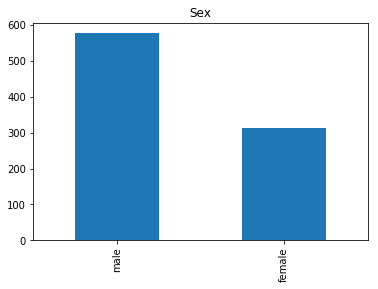

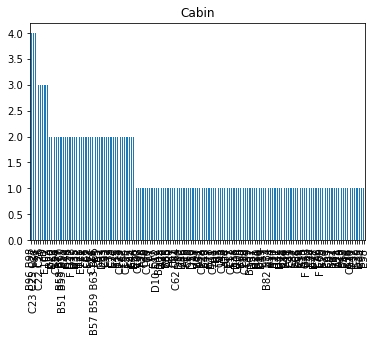

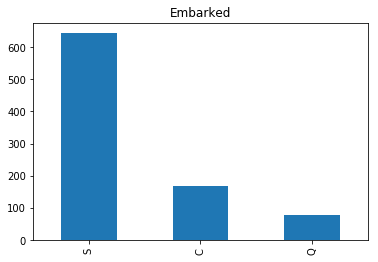

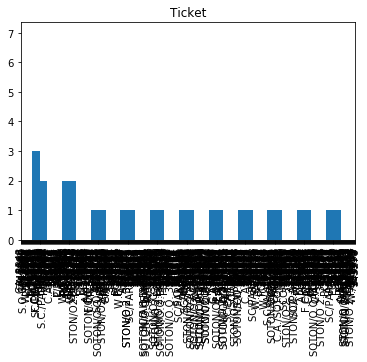

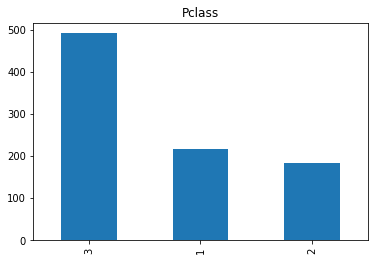

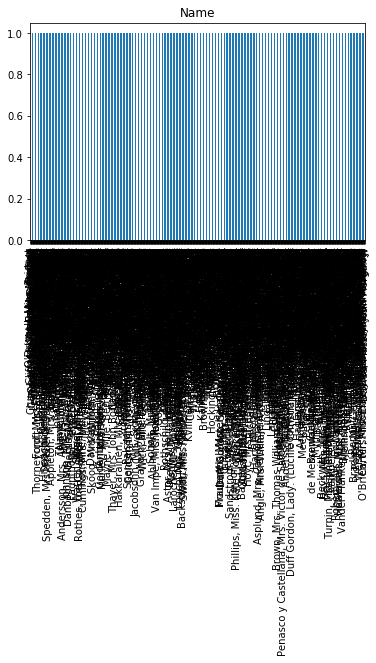

In [54]:
for col in category_feature :
    titanic[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

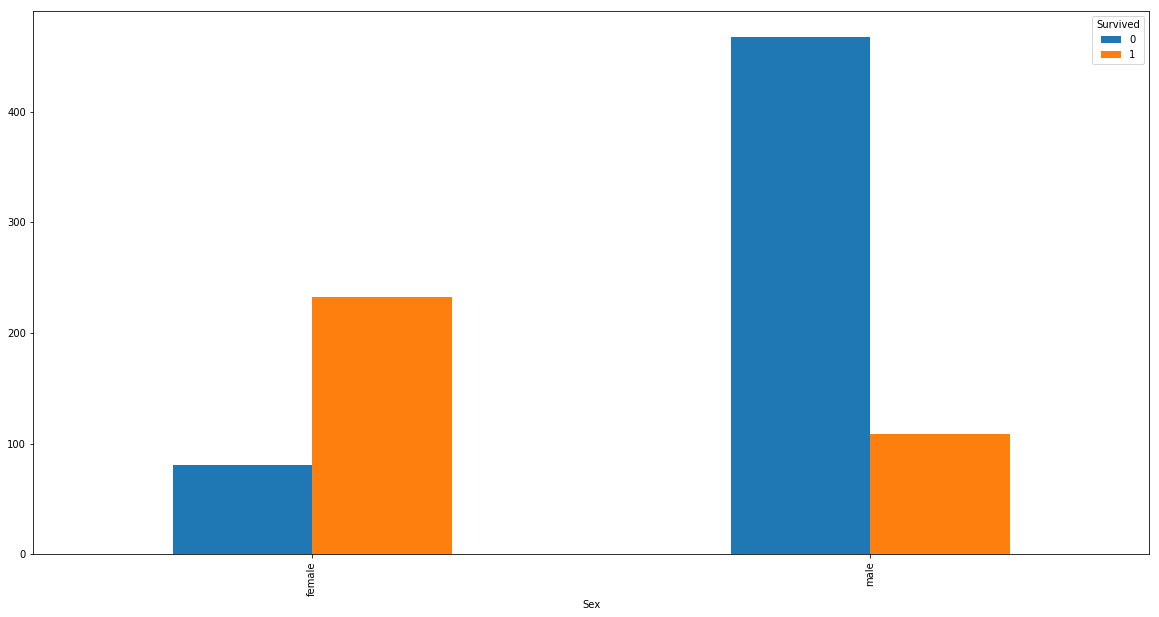

In [55]:
# 이변수

sex_df = titanic.groupby(['Sex', 'Survived'])['Survived'].count().unstack('Survived')
sex_df.plot(kind='bar', figsize=(20, 10))
plt.show()

In [56]:
numerical_feature = list(set(titanic.columns) - set(category_feature) - set(['Passengerld', 'Survived']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['Age', 'Fare', 'Parch', 'PassengerId', 'SibSp'], dtype='<U11')

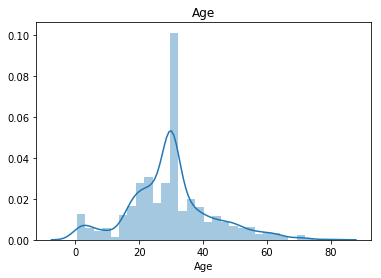

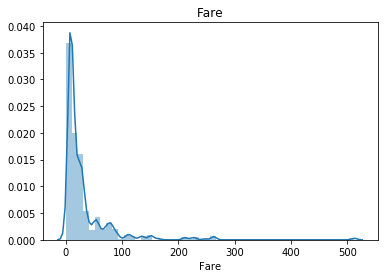

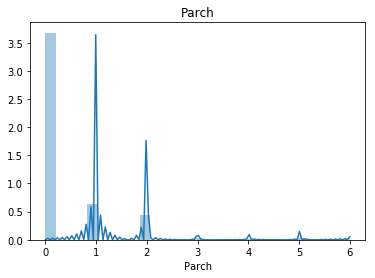

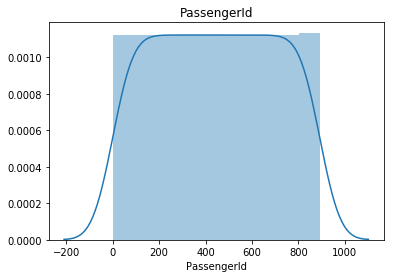

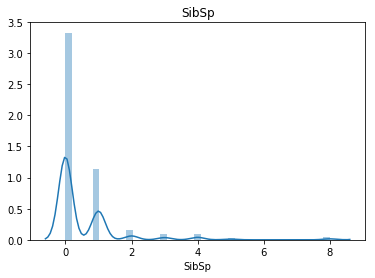

In [57]:
# 단변수

for col in numerical_feature :
    sns.distplot(titanic.loc[titanic[col].notnull(), col])
    plt.title(col)
    plt.show()

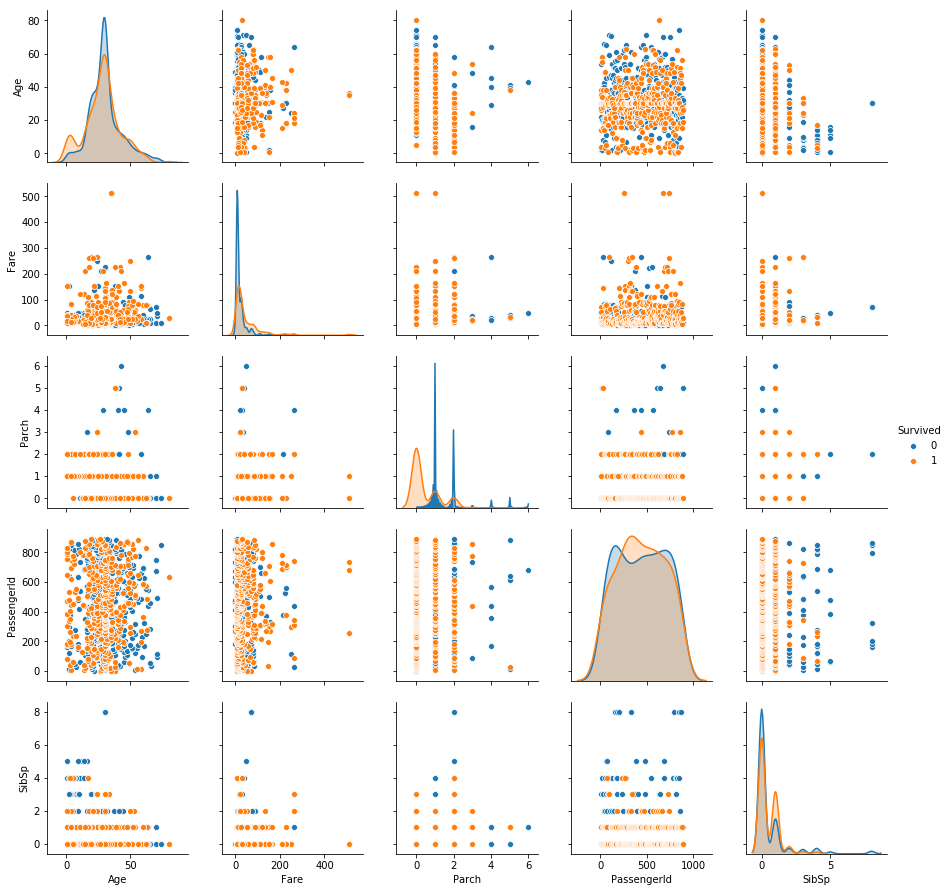

In [58]:
sns.pairplot(titanic[list(numerical_feature) + ['Survived']], hue='Survived',
            x_vars=numerical_feature, y_vars=numerical_feature)
plt.show()